# Assignment Instructions:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly. 
2. Perform a similar anlaysis as done in the reference notebook on this dataset.


In [ ]:
# Data source : https://drive.google.com/file/d/1GzeBrb6NEnFoChpSGveToFeBwLOU8dD2/view
!gdown --id 1GzeBrb6NEnFoChpSGveToFeBwLOU8dD2

Downloading...
From: https://drive.google.com/uc?id=1GzeBrb6NEnFoChpSGveToFeBwLOU8dD2
To: /content/haberman.csv
100% 3.12k/3.12k [00:00<00:00, 5.99MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"],skiprows =1)
df.head()

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.

In [ ]:
# Checking data types of each columns
df.dtypes

age                int64
operation_Year     int64
axil_nodes         int64
survival_status    int64
dtype: object

In [ ]:
# Number of points & Numer of features
print('Number of Data Points : ', df.shape[0])
print('Number of Features : ', df.shape[1])

Number of Data Points :  306
Number of Features :  4


In [ ]:
# Number of classes in survival_status
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [ ]:
# Checking for missing values present or not
print('Data columns with null values :\n',df.isnull().sum())

Data columns with null values :
 age                0
operation_Year     0
axil_nodes         0
survival_status    0
dtype: int64


Observation

---


* From the statistical analysis found out, we have a data set of size **306 x 4**.
* The 'survival_status' class consists of 2 values, class-1 is dominating with 225 data points and class-2 is only 81.
This clearly shows the data set is an imbalanced one.<br>
* The whole data is recorded as integers data type only, so we don't need to change the data type for any further analysis.
* The missinng value count shows there are no missing values in the data set.



### 1.2 - Explain the objective of the problem.

The Haberman Cancer Survival dataset is from the case stufy that was conducted in between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.<br><br>
    
**Objective**<br>
The objective is to predict whether the patient will survive after 5 years or not post the breast cancer operation, based on the patient's age, year of operation and the number of axillary nodes.<br>
ie, this is a binary classificatation problem
<br><br>
**Attribute Information**

1. Age of patient at time of operation<br>
2. Patient's year of operation (year - 1900)<br>
3. Number of positive axillary nodes detected<br>
4. Survival status<br>
    1 = the patient survived 5 years or longer<br>
    2 = the patient died within 5 year<br>

### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots

In [ ]:
# Changing the survival status into 'Yes' or 'No' for making the analysis easier

df['survival_status'] = df['survival_status'].map({1: 'Yes',2:'No'})

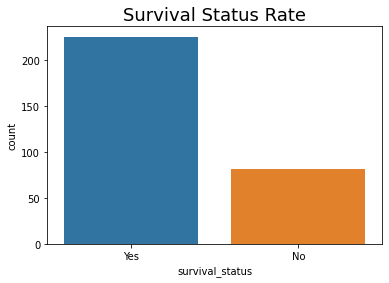


Total number of patients : 306

The percentage of patient who survived 5 years or longer is 73.529% (225 patients)

The percentage of patient who died within 5 years is 26.471% (81 patients)


In [ ]:
# Visualizing distribution of survived_status column data

sns.countplot(x = 'survival_status',data = df)
plt.title('Survival Status Rate', size = 18)
plt.show()


status_counts = df.survival_status.value_counts().values
sum_status_counts = sum(status_counts)
print('\nTotal number of patients : {}\n'.format(sum_status_counts))
print('The percentage of patient who survived 5 years or longer is {:.3f}% ({} patients)\n'.format(
                                            (status_counts[0]*100)/sum(status_counts),status_counts[0]))
print('The percentage of patient who died within 5 years is {:.3f}% ({} patients)'.format(
                                            (status_counts[1]*100)/sum(status_counts),status_counts[1]))

The statistics shows the Haberman Cancer Survival dataset is an imbalanced one.

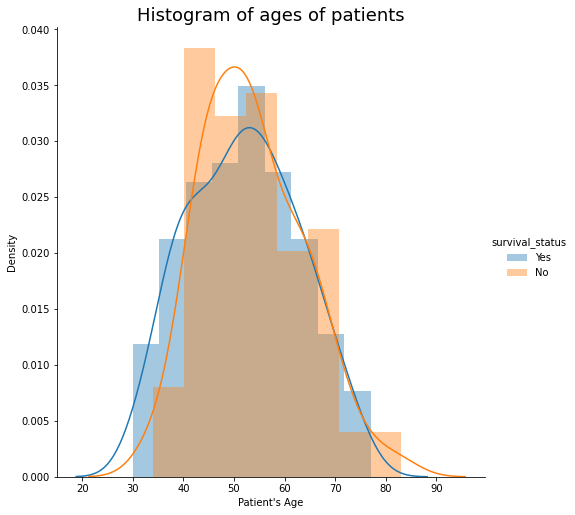

In [ ]:
# Patients age with survival_status

sns.FacetGrid(data =df,hue="survival_status",height=7).map(sns.distplot,"age", kde = True).add_legend()
plt.xlabel("Patient's Age")
plt.title('Histogram of ages of patients', size = 18)
plt.show()

* There is a good amount of overlap between suvived and non-survived.
* Overlap shows the survival is irrespective of ages.
* For people at age 30 have more chance for survival.
* People at age range 75+ are less likely to survive.
* The PDF of Patients age vs survival status almost follows a normal distribution.

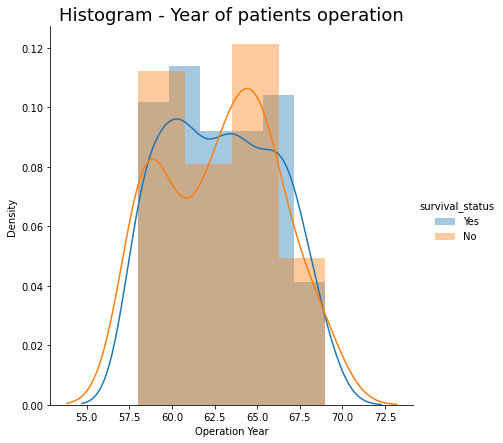

In [ ]:
# Patients age with survival_status as hue

fig_a = sns.FacetGrid(data =df,hue="survival_status",height=6).map(sns.distplot,"operation_Year", kde = True).add_legend()
fig_a.set(xlabel = "Operation Year")
#        xticklabels = [ '19{}'.format(int(label)) for label in ax.get_xticks()])
plt.title('Histogram - Year of patients operation', size = 18)
plt.show() #survival_status #operation_Year

* Huge ovelap is visible, based on this curve we can't make any assumptions.
* The year 1965 and 1958 have less successful operation rates.
* The year 1960 and 1966 have high successful operation rates.

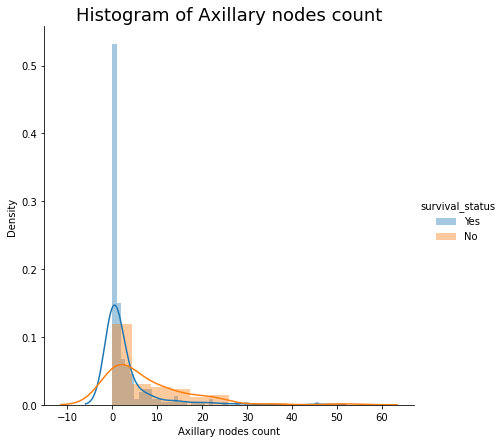

In [ ]:
# Patients Axillary nodes count with survival_status as hue

fig_a = sns.FacetGrid(data =df,hue="survival_status",height=6).map(sns.distplot,"axil_nodes", kde = True).add_legend()
fig_a.set(xlabel = "Axillary nodes count")
#        xticklabels = [ '19{}'.format(int(label)) for label in ax.get_xticks()])
plt.title('Histogram of Axillary nodes count', size = 18)
plt.show() #survival_status #operation_Year

* People with 0 axillary node have higher rate of survival rate.
* Post 10 axillary node count, the survival rate is less,
* There are extreemly high axillary counts such as 50 and 60.

In [ ]:
# Creating different data frames for survival rate status.
df_yes = df[df['survival_status']=='Yes']
df_no = df[df['survival_status']=='No']

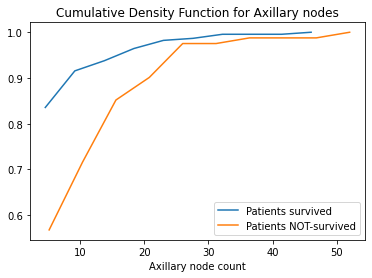

In [ ]:
# Creating CDF plot for Axillary Nodes

plt.title('Cumulative Density Function for Axillary nodes')
counts, bin_edges = np.histogram(df_yes['axil_nodes'], bins = 10, density = True)
pdf = counts /sum(counts)
cdf = np.cumsum(pdf)
# plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)#, label = 'Yes')


counts, bin_edges = np.histogram(df_no['axil_nodes'], bins = 10, density = True)
pdf = counts /sum(counts)
cdf = np.cumsum(pdf)
# plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)#, label = 'No')
plt.xlabel('Axillary node count')

plt.legend(['Patients survived', 'Patients NOT-survived'])
plt.show()

* ~92% of those who survived had only lessthan 10 axillary nodes.
* 85% of people who had almost 15 axillary nodes are not survived.

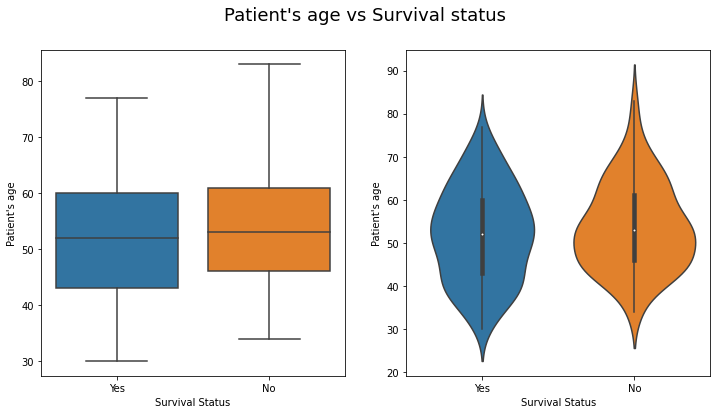

In [ ]:
# Boxplot & Violinplot : Patient's age vs Survival status

fig, axes = plt.subplots(1,2, figsize=(12, 6))
fig.suptitle("Patient's age vs Survival status", fontsize=18)

fig_1 = sns.boxplot(x= 'survival_status', y ='age',data =df, ax=axes[0])
fig_1.set(xlabel = 'Survival Status', ylabel = "Patient's age")

fig_2 = sns.violinplot(x='survival_status', y='age', dodge=False, data=df, ax=axes[1])
fig_2.set(xlabel = 'Survival Status', ylabel = "Patient's age" )

plt.show()

* The median or 50th percentile value of people who survived after 5 years is almost 52 years and for non-survived it is a bit high with almost 53 years.
* The boxplot indicates there are no outliers present in the age feature.
* Age is not a good factor. The distributions are almost similar.
* The 25 ang 75 percentiles of both survived and non-survived are in almost range of 40 to 60.

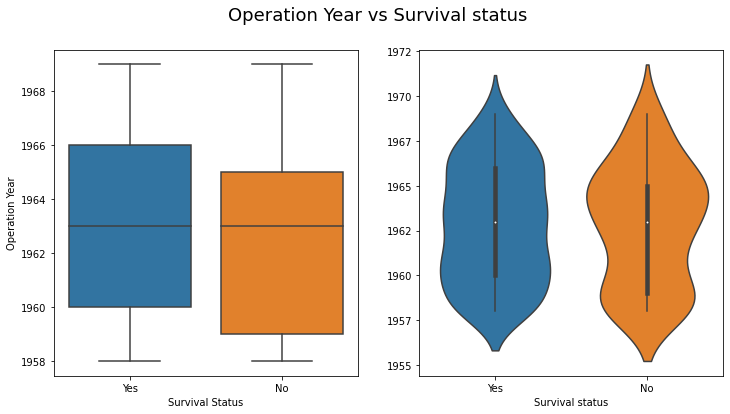

In [ ]:
# Boxplot & Violinplot : Operation Year vs Survival status

fig, axes = plt.subplots(1,2, figsize=(12, 6))
fig.suptitle('Operation Year vs Survival status', fontsize=18)

fig_1 = sns.boxplot(x= 'survival_status', y ='operation_Year',data =df, ax=axes[0])
fig_1.set(xlabel = 'Survival Status', ylabel = "Operation Year",
       yticklabels = [ '19{}'.format(int(label)) for label in fig_1.get_yticks()])

fig_2 = sns.violinplot(x='survival_status', y='operation_Year', data=df, ax=axes[1])
fig_2.set(ylabel = '', xlabel = 'Survival status',
          yticklabels = [ '19{}'.format(int(label)) for label in fig_2.get_yticks()])

plt.show()

* The most people suvived had their operation in year between 1960 & 1966.
* The people who took their operation before 1960 are less likely to survive.
There is a good amount of overlap in both boxplots. Showa year of operation in not a good feature.
* Overlap in data points count is high.

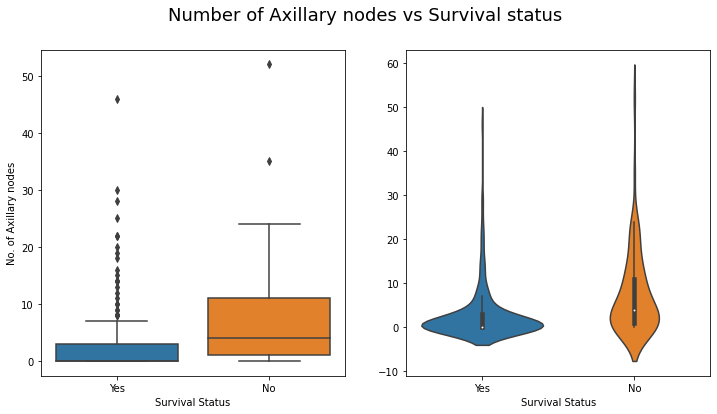

In [ ]:
# Boxplot & Violinplot : Number of Axillary nodes vs Survival status

fig, axes = plt.subplots(1,2, figsize=(12, 6))
fig.suptitle('Number of Axillary nodes vs Survival status', fontsize=18)

fig_1 = sns.boxplot(x= 'survival_status', y ='axil_nodes',data =df, ax=axes[0])
fig_1.set(xlabel = 'Survival Status', ylabel = "No. of Axillary nodes")

fig_2 = sns.violinplot(x='survival_status', y='axil_nodes',data=df, ax=axes[1])
fig_2.set(xlabel = 'Survival Status', ylabel = "")


plt.show()

In [ ]:
# df[df.survival_status=='Yes'].axil_nodes.value_counts()

In [ ]:
# df[df.survival_status=='No'].axil_nodes.value_counts()

* Boxplot indicating there are outliers in axillary node feature.
* There are people with zero axillary nodes survived and non-survived. So it's not a good feature to describe the nature.
* As th number of axillary nodes increases, the chance for the survival decreasing.
* Persons with graterthan 5 axillary node have less chance for suvival.

#### Observation
1. The data set is an imbalanced one.
2. Violinplot and boxplot for age and operation year are almost similar and there is a huge overlap between points.
3. Persons with graterthan 5 axillary node have less chance for suvival.
4. In the year 1965 counts more number of unsuccessful operations.

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots

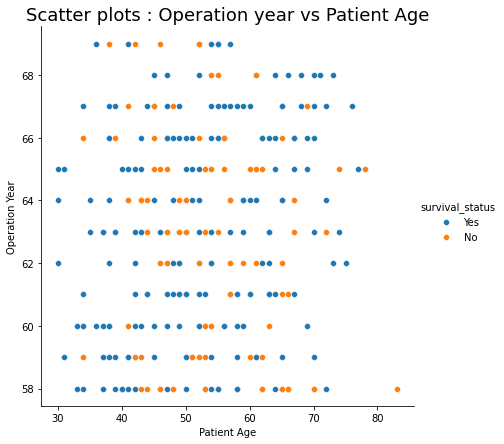

In [ ]:
# Scatter plots : Operation year vs Patient Age

g = sns.FacetGrid(df, hue = 'survival_status', height = 6).map(sns.scatterplot, 'age', 'operation_Year').add_legend()
g.set(xlabel = 'Patient Age', ylabel = 'Operation Year')
plt.title('Scatter plots : Operation year vs Patient Age', size = 18)

plt.show()

* Operation year and patient age is not having any such kind of correlation.
* The age group 40-60 and year 1962-1966 shows comparitively more data points and also less survival rates too

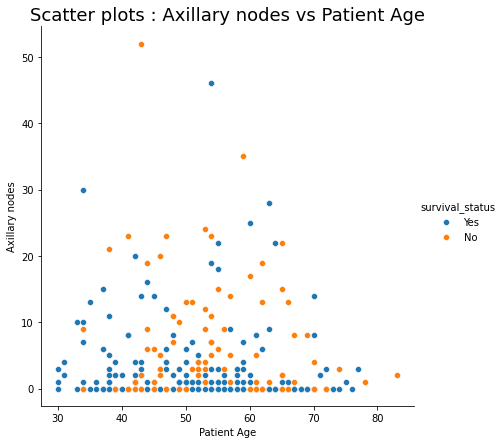

In [ ]:
# Scatter plots : Axillary nodes vs Patient Age

g = sns.FacetGrid(df, hue = 'survival_status', height = 6).map(sns.scatterplot, 'age', 'axil_nodes').add_legend()
g.set(xlabel = 'Patient Age', ylabel = 'Axillary nodes')
plt.title('Scatter plots : Axillary nodes vs Patient Age', size = 18)

plt.show()

* Patients with zero axillary nodes are more likely to survive irrespective of their age group.
* There are few patients with morethan 25 axillary nodes.
* Patients with age morethan 50, and with nodes more than 10 are less likely to survive.

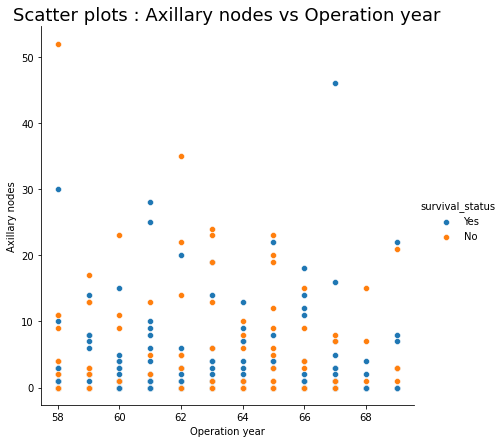

In [ ]:
# Scatter plots : Axillary nodes vs Operation year

g = sns.FacetGrid(df, hue = 'survival_status', height = 6).map(sns.scatterplot, 'operation_Year', 'axil_nodes').add_legend()
g.set(xlabel = 'Operation year', ylabel = 'Axillary nodes')
plt.title('Scatter plots : Axillary nodes vs Operation year', size = 18)

plt.show()

* There are only few occations with axillary node count greater than 30.
* If axillary node count is greater than 10, the chance for survival is less and irrespective of year of operations.

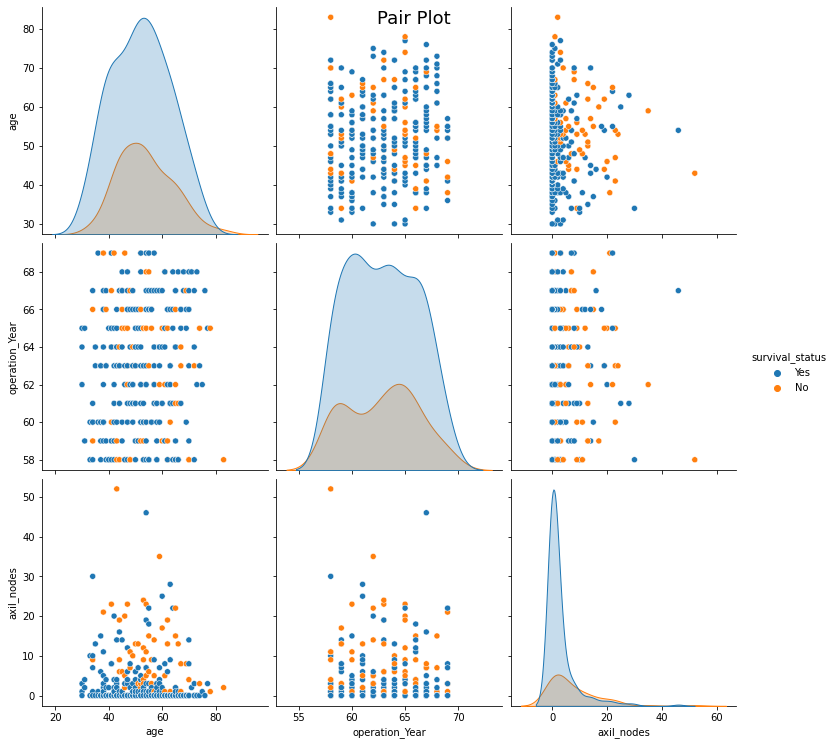

In [ ]:
# Pairplot between all the features

g = sns.pairplot(df, hue="survival_status", height=3.5)
g.fig.suptitle('Pair Plot', size =18)
plt.show()

* Making a conclution from pairplot is hard.
* Most of the points are overlapped.

### 1.5 Summarize your final conclusions of the Exploration

1. In the data set there are 306 observations and with 4 features.
2. This is an imbalanced data set with no missing values.
    1. The percentage of patient who survived 5 years or longer is 73.529% (225 patients)
    2. The percentage of patient who died within 5 years is 26.471% (81 patients)
3. Both age and year of operation not seems to be a good feature. There are alot of overlap between them, and which that shows both are almost similar.
4. The axillary nodes count seems to be a good feature compariviely. People with lessthan 5 axillary mostly survived the cancer.
5. The operation year 1965 was comparitively a failure, most were not survived.
6. ~92% of those who survived had only lessthan 10 axillary nodes.

In [ ]:
!jupyter nbconvert --to PDF 'EDA_assignment_instructions.ipynb'

[NbConvertApp] Converting notebook EDA_assignment_instructions.ipynb to PDF
[NbConvertApp] Support files will be in EDA_assignment_instructions_files/
[NbConvertApp] Making directory ./EDA_assignment_instructions_files
[NbConvertApp] Making directory ./EDA_assignment_instructions_files
[NbConvertApp] Making directory ./EDA_assignment_instructions_files
[NbConvertApp] Making directory ./EDA_assignment_instructions_files
[NbConvertApp] Making directory ./EDA_assignment_instructions_files
[NbConvertApp] Making directory ./EDA_assignment_instructions_files
[NbConvertApp] Making directory ./EDA_assignment_instructions_files
[NbConvertApp] Making directory ./EDA_assignment_instructions_files
[NbConvertApp] Making directory ./EDA_assignment_instructions_files
[NbConvertApp] Making directory ./EDA_assignment_instructions_files
[NbConvertApp] Making directory ./EDA_assignment_instructions_files
[NbConvertApp] Making directory ./EDA_assignment_instructions_files
[NbConvertApp] Writing 60215 byte